In [4]:
# 先清空資料夾、多了評論數與標籤、變更圖片取名規則
# 圖片只會下載10張梗圖

# Load all URL images
import requests,os,glob
import json
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
s=0

ua = UserAgent()
user_agent = ua.random
headers = {'user-agent': user_agent}

url = 'https://www.dcard.tw/f/meme'
html = requests.get(url,headers=headers)
html.encoding="UTF-8"

sp = BeautifulSoup(html.text,'html.parser')
#建立images存圖片
images_dir="images/"
if not os.path.exists(images_dir):
    os.mkdir(images_dir)

pc_files = glob.glob(images_dir+'*.jpg')#刪除資料夾內的圖片
for pc_file in pc_files:
    try:
        os.remove(pc_file)
    except OSError as e:
        print(f"Error:{ e.strerror}")

all_links=sp.find_all('img')
for link in all_links:
#取 src 和 href 屬性内容
    if s==11:
        break
    src=link.get('src')
    href = link.get('href') #指定一個URL看連結要到哪
    attrs=[src,href]
    for attr in attrs:
#讀取 .jpg 和 .png檔
        if attr != None and ('.webp' in attr):
            full_path = attr
            filename= full_path.split('/')[-1]#取得圖檔名
            print(full_path)#儲存圖片
            if s!=0:
                try :
                    headers = {'user-agent':ua.random}
                    image = requests.get(full_path,headers=headers)
                    f = open(images_dir + str(s)+".jpg", "wb")
                    f.write(image.content)
                    f.close()
                    #print("我是",s)
                except:
                    print("{}無法讀取!".format(filename))
            s+=1
#以下使用api獲取按讚數
#參考https://marketingliveincode.com/?p=5009
alldata = []
last_article = ''
likeCount=[]
commentCount=[]
topics={}
url = 'https://www.dcard.tw/service/api/v2/forums/meme/posts?popular=true&limit=10'
for i in range(5):
    if i != 0: # 判斷是否是第一次執行
        request_url = url +'&before='+ str(last_article)
    else:
        request_url = url # 第一次執行，不須加上後方的before
    ua = UserAgent()
    headers = {'user-agent': ua.random}
    list_req = requests.get(request_url,headers=headers) # 請求
    #將整個網站的程式碼爬下來
    getdata = json.loads(list_req.content)
    alldata.extend(getdata) # 將另一個陣列插在最後面
    last_article = getdata[-1]['id'] # 取出最後一篇文章
    
for i in range(10):
    topicscount=len(alldata[i]['topics'])
    for j in range(topicscount):
        if alldata[i]['topics'][j] not in topics:
            topics[alldata[i]['topics'][j]]=[str(i)+".jpg"]
        else:
            topics[alldata[i]['topics'][j]].insert(-1,str(i)+".jpg")
with open("test.txt","w+",encoding="UTF-8-sig")as f:
    for i in range(10):
        likeCount.append(alldata[i]['likeCount'])
    for i in range(10):
        commentCount.append(alldata[i]['commentCount'])
    print("likeCount:",likeCount)
    print("commentCount:",commentCount)
    print("topics:",topics)
    f.write(str(likeCount)+"\n")
    f.write(str(commentCount)+"\n")
    f.write(str(topics))

https://megapx.dcard.tw/v1/images/926dcd27-8107-4745-a07f-3c07a4baa93d/encode/640.webp
https://megapx.dcard.tw/v1/images/b0e0e2bd-9072-430f-a400-7a5dae9435b7/encode/640.webp
https://megapx.dcard.tw/v1/images/b785baf2-ebb1-493a-89bc-8351e6727f13/encode/640.webp
https://megapx.dcard.tw/v1/images/807fc8e5-7c2f-4de0-8392-285e98cf1c86/encode/640.webp
https://megapx.dcard.tw/v1/images/e2297e3b-0bda-4d45-af52-5a16c1cd8c1e/encode/640.webp
https://megapx.dcard.tw/v1/images/c469bd95-08ad-4808-98b7-d7f45d2b34eb/encode/640.webp
https://megapx.dcard.tw/v1/images/910adca6-466c-4bf8-a8b4-9c3618faa64f/encode/640.webp
https://megapx.dcard.tw/v1/images/05cd6e00-8f8a-4cfc-be4a-402f1d46d7ab/encode/640.webp
https://megapx.dcard.tw/v1/images/44ddc511-f8ca-42b5-adbc-71da9d2a940a/encode/640.webp
https://megapx.dcard.tw/v1/images/7f37abd8-2418-4165-b3ad-f526f2bfaed5/encode/640.webp
https://megapx.dcard.tw/v1/images/c71bb1ba-67c0-4bfd-8b9b-eb3f9f39f6de/encode/640.webp
likeCount: [2082, 1245, 996, 694, 512, 500,

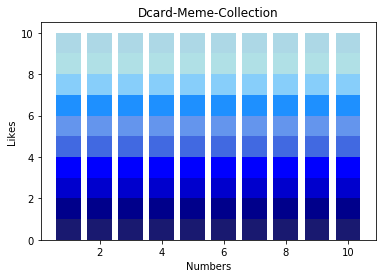

In [4]:
# test: 做出10個按照長度大小區分的長條圖
import matplotlib.pyplot as plt
import numpy as np

'''
x = np.random.randn(1000)    
plt.hist(x,bins=20,color='b')
    

plt.title("example")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


'''

num1 = 10
num2 = 9
num3 = 8
num4 = 7
num5 = 6
num6 = 5
num7 = 4
num8 = 3
num9 = 2
num10 = 1

likes = [num1,num2,num3,num4,num5,num6,num7,num8,num9,num10]  # 將喜愛數加入likes的陣列
color=['LightBlue','PowderBlue', 'LightSkyBlue', 'DodgerBlue', 'CornflowerBlue',
       'RoyalBlue','Blue', 'MediumBlue','DarkBlue','MidnightBlue']

for i in range(1,11):  # 將喜愛度從num1-num10排序
    numbers = i
    x = np.arange(numbers)
    #plt.bar(numbers,likes,color[i-1])
    plt.bar(numbers, likes, 
            color=['LightBlue',
               'PowderBlue', 
               'LightSkyBlue', 
               'DodgerBlue', 
               'CornflowerBlue', 
               'RoyalBlue', 
               'Blue', 
               'MediumBlue',
               'DarkBlue',
               'MidnightBlue'
               ])
    
'''
    
# x = np.arange(len(numbers))  # 10
x = np.arange(10)  
plt.bar(numbers, likes, 
            color=['LightBlue',
               'PowderBlue', 
               'LightSkyBlue', 
               'DodgerBlue', 
               'CornflowerBlue', 
               'RoyalBlue', 
               'Blue', 
               'MediumBlue',
               'DarkBlue',
               'MidnightBlue'
               ])
'''
# plt.xticks(numbers, likes)
plt.xlabel('Numbers')
plt.ylabel('Likes')
plt.title('Dcard-Meme-Collection')
plt.show()

In [ ]:
def getdcard():
    dcard()
    for i in tag:
        image = Image.open(f'C:/Users/weili/OneDrive/桌面/py/image/{i}') #讀入圖片
        globals()[f'{i}'] = image.resize((500,300),Image.ANTIALIAS)
        globals()[f'{i}'] = ImageTk.PhotoImage(globals()[f'{i}'])#把圖片轉成tkinter的格式
        globals()[f'p{i}'] = Label(window,image=globals()[f'{i}'])
        print(i)

    p1.place(x=0,y=250)
    p2.place(x=500,y=250)

    for i in range(3,11):
           if i < 7:
               globals()[f'p{i}'].place(x=1000,y=250(i-3)) 
           else:
               globals()[f'p{i}'].place(x=1500,y=250(i-7))

def comparision():#比對
    global equ
    if equ in topics:
        tag=topics[equ]

    elif equ=="搜尋":
        tag=[str(i)+".jpg" for i in range(1,11)]